In [6]:
import pandas as pd

In [8]:
dataset= pd.read_csv("pre_placement.csv")
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.000000,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.000000,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.000000,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,288655.405405,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.000000,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211.0,80.60,82.00,77.60,91.0,74.49,400000.000000,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
211,212.0,58.00,60.00,72.00,74.0,53.62,275000.000000,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
212,213.0,67.00,67.00,73.00,59.0,69.72,295000.000000,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
213,214.0,74.00,66.00,58.00,70.0,60.23,204000.000000,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [10]:
#dataset.isnull().sum()    # checking for missing value...

# Normal Distribution

In [13]:
import seaborn as sns    #library used for graphical representation......

C:\Users\Sujithvarman\AppData\Local\Temp\ipykernel_1840\2590864738.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["ssc_p"])


<Axes: xlabel='ssc_p', ylabel='Density'>

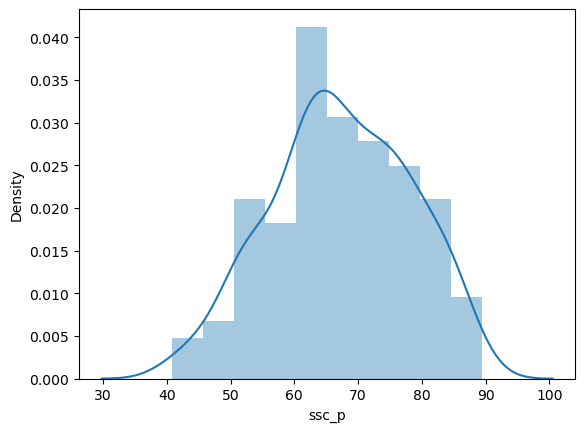

In [21]:
sns.distplot(dataset["ssc_p"])

# Normal Distribution & Probability Density Function

In [30]:
def QualQuan(dataset): # if you mentioned any variable in open paranthisis only, you can use the class in future...

    Qual=[]
    Quan=[]
    
    for columnName in dataset.columns:
        
        if(dataset[columnName].dtypes=="O"):
            #print("Qual")
            Qual.append(columnName)                ##### Function created #####
            
            
        else:                              
            #print("Quan")
            Quan.append(columnName)
            
    return Qual,Quan

In [32]:
Qual,Quan= QualQuan(dataset)

In [34]:
Quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [90]:
# there is no inbuild feature for probability density function so "by_own".... 

def get_pdf(dataset,startrange,endrange):


    from matplotlib import pyplot as plt
    from scipy.stats import norm as nor    # this library used for importing "Normal Distribution".....
    import seaborn as sns
    
    ax=sns.distplot(dataset,kde=True,kde_kws={"color":"blue"},color="Green")
    plt.axvline(startrange,color="Red")                  # creating skeleton for the distribution.....
    plt.axvline(endrange,color="Red")
    
    sample=dataset
    sample_mean=sample.mean()
    sample_std=sample.std()
    print("mean=%.3f,standard_deviation=%.3f" % (sample_mean,sample_std))  # creating "Normal Distribution" using mean and std...
    dist=nor(sample_mean,sample_std) 
    
    
    values=[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value)for value in values]             # using "Normal Distribution" getting probability value of "pdf"....
    prob=sum(probabilities)
    print("the area between range({},{}:){}".format(startrange,endrange,prob))


    return prob


mean=67.303,standard_deviation=10.827
the area between range(20,50:)0.049989667230360114


C:\Users\Sujithvarman\AppData\Local\Temp\ipykernel_15740\1818672837.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset,kde=True,kde_kws={"color":"blue"},color="Green")


0.049989667230360114

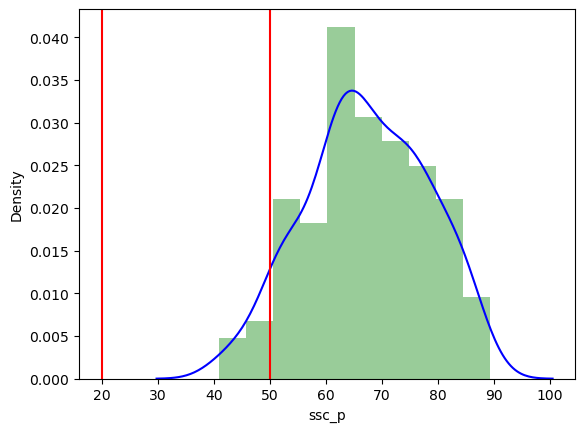

In [95]:
get_pdf(dataset["ssc_p"],20,50)

# cumulative density function

In [117]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset["ssc_p"])
ecdf(80)

0.8651162790697674

# Standard Normal Distribution

In [23]:
def SND(dataset):

    import seaborn as sns
    
    mean=dataset.mean()
    std=dataset.std()
    
    values=[i for i in dataset]
    z_score = [((j-mean)/std) for j in values]
    
    sns.distplot(z_score,kde=True)
    

C:\Users\Sujithvarman\AppData\Local\Temp\ipykernel_1840\3633316483.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)


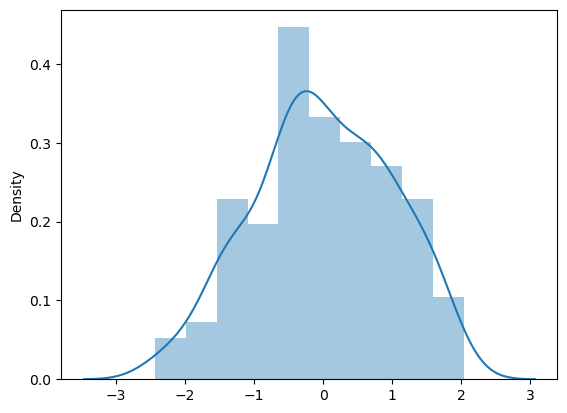

In [25]:
SND(dataset["ssc_p"])